## Linear classification - Perceptron

Consider a simple classification problem of whether or not a candidate's profile is accepted for a job interview.

**Problem Statement**

> HR of company ABC decides whether or not to give a chance for the job interview. For simplicity, only two parameters are considered - **GPA** and **year of experience**. A dataset of GPA, year of experience and decision (True or False) is provided in `candidates.csv`.

### Preview dataset

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

candidates = pd.read_csv('./candidates.csv')

In [2]:
candidates.head()

,gpa,experience,offer
0,5.5,2.5,0
1,5.4,3.0,0
2,3.1,3.0,0
3,5.8,5.5,0
4,5.2,4.5,0


**Draw a scatter plot**

* **X-axis** - GPA
* **Y-axis** - Years of experience
* **Colors**
    * **Red**   - Reject
    * **Green** - Accept

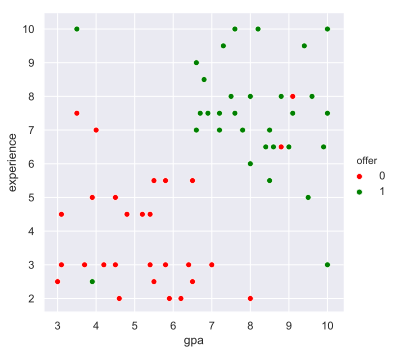

In [3]:
sns.pairplot(
    x_vars = ["gpa"],
    y_vars = ["experience"],
    data = candidates,
    hue = "offer",
    height = 5,
    palette = {0:"red", 1:"green"}
)

A line can be easily drawn to separate **Red** and **Green** dots. Let's draw a line with points determined from naked eye. Also, label **GPA** as `x1` and **Experience** as `x2`.

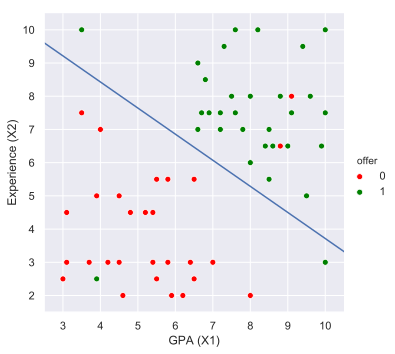

In [4]:
# Scatter plot (same as before)
g = sns.pairplot(
    x_vars = ["gpa"],
    y_vars = ["experience"],
    data = candidates,
    hue = "offer",
    height = 5,
    palette = {0:"red", 1:"green"}
)

# Add Labels, axes
g.set(
    xlim = (2.5, 10.5),
    ylim = (1.5, 10.5),
    xlabel="GPA (X1)",
    ylabel="Experience (X2)"
)

# Plot line
plt.plot([2, 16], [10, -1])

Equation of the line passing through points `(2, 16)`, `(10, -1)` can be calculated as,

$$
\frac{y - y_1}{x - x_1} = \frac{y_2 - y_1}{x_2 - x_1}
$$

$$
\frac{y - 16}{x - 2} = \frac{-17}{8}
$$

$$
17x + 8y - 162 = 0
$$

In terms of $x_1$ and $x_2$,

$$
17x_1 + 8x_2 - 162 = 0
$$

We can use this equation to determine whether a new candidate would be offered an interview or not. Consider the left part of the equation as `Score`

**Score**

`Score = (17 * GPA) + (8 * Experience) - 162`

**Prediction**

* `Score > 0` - **<span style="color:green">Accept</span>**
* `Score < 0` - **<span style="color:red">Reject</span>**

### Modelling

**Boundary Line**

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

In terms of vectors,

$$
Wx + b = 0
$$

where,

$$
W = (w_1, w_2),
x = (x_1, x_2),
y = "0" or "1"
$$

**Prediction**

$$
\hat{y} =
\left\{
\begin{array}{ll}
1 & \mbox{if $Wx + b \geq 0$},\\
0 & \mbox{if $Wx + b \lt 0$},\\
\end{array}
\right.
$$

## Perceptron

The equation `Score = (17 * GPA) + (8 * Experience) - 162` can be modelled as a **Perceptron**. Following diagram represents the model visualization

![Perceptron - Candidate](perceptron-candidate.svg)

In the case of Candidate selection, only 2 dimensions (GPA, Experience) are considered for decision. We can extend to `N` dimensions using perceptron model

![Perceptron - general](perceptron-general.svg)

### Step function

For calculating `y`, we use the following function knows as **Step function**

$$
y =
\left\{
\begin{array}{ll}
1 & \mbox{if $x\geq 0$},\\
0 & \mbox{if $x \lt 0$},\\
\end{array}
\right.
$$

![Step function](perceptron-step.svg)

### Perceptron trick

How do we actually let the computer calculate equation of the line? It can be achieved using the following abstract algorithm

```
1  Draw a random line
2  Get all mis-classified points
3  Improve the line using the mis-classified points
4  Repeat 2-3 for n times or until satisfactory result
```

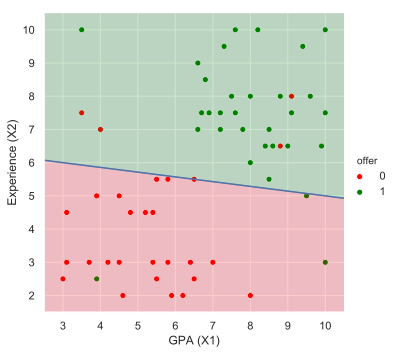

In [5]:
# Scatter plot (same as before)
g = sns.pairplot(
    x_vars = ["gpa"],
    y_vars = ["experience"],
    data = candidates,
    hue = "offer",
    height = 5,
    palette = {0:"red", 1:"green"}
)

# Add Labels, axes (same as before)
g.set(
    xlim = (2.5, 10.5),
    ylim = (1.5, 10.5),
    xlabel="GPA (X1)",
    ylabel="Experience (X2)"
)

def draw_the_random_line_with_region():
    # Draw a random line (say, x + 7y - 45 = 0)
    x  = np.arange(0, 12, 0.1)
    y_line = (45 - x) / 7

    y_lower = np.zeros(x.shape)        # For Lower box (y = 0)
    y_upper = 11 * np.ones(x.shape)  # For Upper box (y = 11x)

    plt.plot(x, y_line)

    plt.fill_between(x, y_line, y_lower, color='red', alpha='0.2')
    plt.fill_between(x, y_line, y_upper, color='green', alpha='0.2')
    
draw_the_random_line_with_region()

Let's plot only the misclassified points

In [6]:
# Get red points in green region, and
#     green points in red region
misclassified_candidates = candidates \
    .query("""
        (offer == 0 & (gpa + 7*experience - 45) > 0) | (offer == 1 & (gpa + 7*experience - 45) < 0)
    """)
misclassified_candidates

,gpa,experience,offer
10,3.9,2.5,1
29,9.1,8.0,0
42,8.8,6.5,0
52,10.0,3.0,1
53,9.5,5.0,1
56,4.0,7.0,0
57,3.5,7.5,0


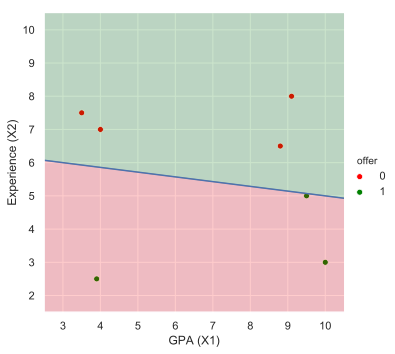

In [7]:
# Scatter plot (same as before, with `misclassified_candidates`)
g = sns.pairplot(
    x_vars = ["gpa"],
    y_vars = ["experience"],
    data = misclassified_candidates,
    hue = "offer",
    height = 5,
    palette = {0:"red", 1:"green"}
)

# Add Labels, axes (same as before)
g.set(
    xlim = (2.5, 10.5),
    ylim = (1.5, 10.5),
    xlabel="GPA (X1)",
    ylabel="Experience (X2)"
)

draw_the_random_line_with_region()

In order to move the line **closer** to the point,

* **For red point in green region** -> *Subtract* `(p1, p2, 1)` from the line coefficients `(a, b, c)`
* **For green point in red region** -> *Add*      `(p1, p2, 1)` from the line coefficients `(a, b, c)`

But to avoid biasing, we add/subtract only a fraction of the point, known as **Learning rate**. 

Let `learning_rate = 0.1`

For example, consider a red point in green region - `(9.1, 8.0)`

We subtract `(9.1, 8.0, 1) x 0.1 = (0.91, 0.8, 0.1)` 

```
       1     7     -45
-   0.91   0.8     0.1
------------------------
    0.09   6.2     -45.1
------------------------
```

But, 

New line is `0.09x + 6.2y - 45.1 = 0`

Let's plot the line before (solid) and after (dotted) subtraction

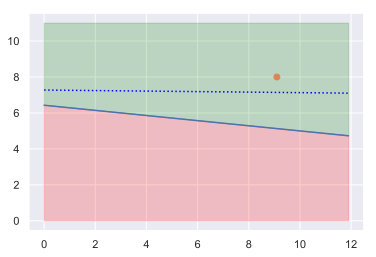

In [8]:
draw_the_random_line_with_region() # Line before subtraction
plt.plot(9.1, 8.0, marker = 'o')   # Plot the point

x_hat  = np.arange(0, 12, 0.1)
y_hat = (45.1 - 0.09 * x_hat) / 6.2
plt.plot(x_hat, y_hat, linestyle=':', color='blue')

### Perceptron algorithm

Using the **Perceptron trick**, Perceptron algorithm can be written as follows

```
PERCEPTRON_ALGORITHM()

1   Initialize the line with random weights: w1, w2 ... wn, b
2   For each misclassified point (x1, x2 ..., xn) do
3       if prediction == 0:
4           Wi = Wi + xi * learning_rate
5           b  = b + learning_rate
6       else if prediction == 1:
7           Wi = Wi - xi * learning_rate
8           b  = b - learning_rate
```

To implement the perceptron algorithm, the following are the building blocks

* Step function
* Prediction function
* Perceptron step
* Perceptron training

First, get `X` and `y`

In [9]:
X = candidates.to_numpy()[:,[0, 1]]
y = candidates.to_numpy()[:,[2]]

# Normalize
X /= 10
print(X[:5])  # Top 5
print(y[:5])  # Top 5

[[0.55 0.25]
 [0.54 0.3 ]
 [0.31 0.3 ]
 [0.58 0.55]
 [0.52 0.45]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


#### Step function

In [10]:
def step_function(x):
    """Step function
    
    Returns 1 if x >= 0
    Returns 0 if x < 0
    
    """
    if x >= 0: return 1
    return 0

assert(step_function(1) == 1)
assert(step_function(0) == 1)
assert(step_function(-5) == 0)

In [11]:
def prediction(X, W, b):
    """Prediction function
    
    W = (w1, w2), X = (x1, x2), b
    """
    product = np.matmul(X, W) + b
    return step_function(product[0])

prediction(
    [[0.5, 0.8], [0.3, 0.2]],
    [[-0.2], [0.5]],
    [[-0.9]]
)

0

In [12]:
def perceptron_step(X, y, W, b, learning_rate):
    for i in range(len(X)):
        point = X[i]
        pred = prediction(point, W, b)
        if y[i] - pred == 1: # y[i] = 1, pred = 0
            W[0] += point[0] * learning_rate
            W[1] += point[1] * learning_rate
            b += learning_rate
        elif y[i] - pred == -1: # y[i] = 0, pred = 1
            W[0] -= point[0] * learning_rate
            W[1] -= point[1] * learning_rate
            b -= learning_rate
    return W, b

In [13]:
def train_perceptron(X, y, learning_rate = 0.01, epochs = 25):
    W = np.random.rand(2, 1) # [[w1], [w2]]
    b = np.random.rand(1)
    
    lines = []
    for _ in range(epochs):
        W, b = perceptron_step(X, y, W, b, learning_rate)
        lines.append((-W[0] / W[1], -b / W[1]))
        
    return lines

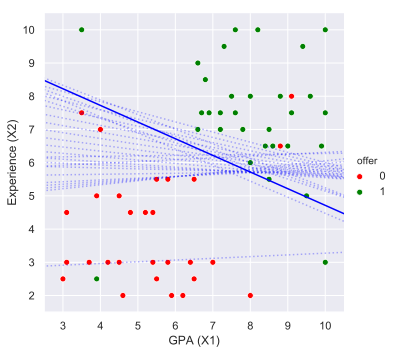

In [14]:
np.random.seed(43)
g = sns.pairplot(
    x_vars = ["gpa"],
    y_vars = ["experience"],
    data = candidates,
    hue = "offer",
    height = 5,
    palette = {0:"red", 1:"green"}
)

# Add Labels, axes (same as before)
g.set(
    xlim = (2.5, 10.5),
    ylim = (1.5, 10.5),
    xlabel="GPA (X1)",
    ylabel="Experience (X2)"
)

# Train Perceptron
lines = train_perceptron(X, y, epochs=25)

# Draw all the lines
lines_draw = []
for line in lines:
    x_points = np.arange(0, 12, 0.1)
    y_points = line[0][0] * x_points + line[1][0] * 10
    lines_draw.append((x_points, y_points))

for line in lines_draw[:-1]:
    plt.plot(line[0], line[1], linestyle=':', color='blue', alpha=0.3)
    
# Draw the final line
last = lines_draw[-1]
plt.plot(last[0], last[1], linestyle='-', color='blue')

The **blue** line is generated by the **Perceptron algorithm**